!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/human_activity.csv')
labels={1:"WALKING",2:"WALKING_UPSTAIRS",
         3:"WALKING_DOWNSTAIRS",4:"SITTING",
         5:"STANDING",6:"LAYING" }

##########데이터 분석

##########데이터 전처리
# XGBoost는 클래스가 항상 0부터 시작되어야 함.
df['action']=df['action']-1

x_data = df.drop(['action'], axis=1)
y_data = df['action']

# x_data = x_data[feature_20]
# print(x_data.head())

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=43, stratify=y_data)


##########모델 생성
# 결정 트리 400개 생성
# 학습률 0.1
# 결정트리의 최대 깊이는 3

model = XGBClassifier(n_estimators=200)
# model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

##########모델 학습

evals = [(x_test, y_test)]

#multiclass일 경우 mlogloss
# 조기 종료 함 10회 부스팅해도 성능이 좋아지지 않으면
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=evals, verbose=True)


##########모델 검증


#평가 리포트

y_predict = model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=list(labels.values())))
            
##########모델 예측




[0]	validation_0-mlogloss:1.10196
[1]	validation_0-mlogloss:0.79769
[2]	validation_0-mlogloss:0.60414
[3]	validation_0-mlogloss:0.46955
[4]	validation_0-mlogloss:0.37295
[5]	validation_0-mlogloss:0.30260
[6]	validation_0-mlogloss:0.24808
[7]	validation_0-mlogloss:0.20662
[8]	validation_0-mlogloss:0.17339
[9]	validation_0-mlogloss:0.14845
[10]	validation_0-mlogloss:0.12841
[11]	validation_0-mlogloss:0.11302
[12]	validation_0-mlogloss:0.09974
[13]	validation_0-mlogloss:0.08966
[14]	validation_0-mlogloss:0.08113
[15]	validation_0-mlogloss:0.07496
[16]	validation_0-mlogloss:0.06859
[17]	validation_0-mlogloss:0.06337
[18]	validation_0-mlogloss:0.05926
[19]	validation_0-mlogloss:0.05622
[20]	validation_0-mlogloss:0.05299
[21]	validation_0-mlogloss:0.05072
[22]	validation_0-mlogloss:0.04856
[23]	validation_0-mlogloss:0.04643
[24]	validation_0-mlogloss:0.04463
[25]	validation_0-mlogloss:0.04324
[26]	validation_0-mlogloss:0.04212
[27]	validation_0-mlogloss:0.04119
[28]	validation_0-mlogloss:0.0

```
> 와우~~~ 초대박
```

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

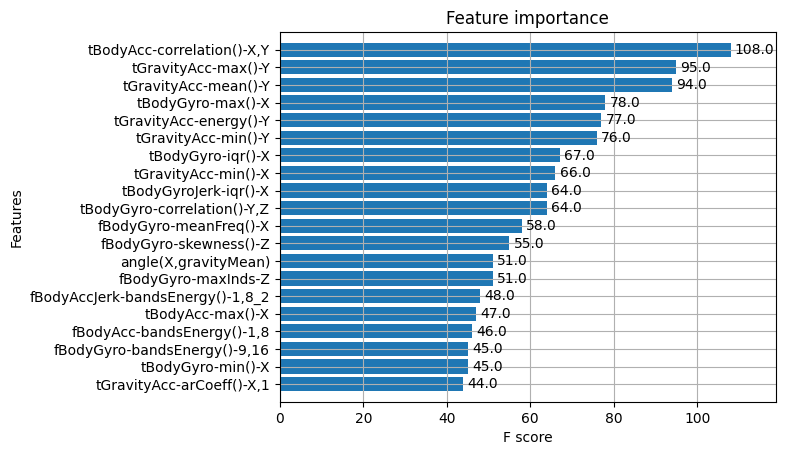

In [3]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model,max_num_features=20,height=0.8)
            

In [4]:
##########모델 배포

import joblib
joblib.dump(model, './model/xgb_model.pkl') #모델 배포


['./model/xgb_model.pkl']